En este ejemplo estudiaremos el comportamiento de los sismos ocurridos 
en Perú durante el período de 1960-2021. La información ha sido recopilada por el 
Instituto Geofísico del Perú (IGP)

El presente trabajo se dividirá en 3 etapas:
- 1ra Etapa : Limpieza y orden de los datos
- 2da Etapa: Descripción de los datos
- 3ra Etapa: Visualización gráfica de los datos

El link de referencia es el siguiente:
https://www.datosabiertos.gob.pe/dataset/catalogo-sismico-1960-2021-igp

---

OBTENCIÓN Y COMPRENSIÓN DE LOS DATOS

In [1]:
# Importamos la librería a utilizar.

import pandas as pd

In [2]:
# Extraemos los datos.

data = pd.read_excel("Catalogo1960_2021.xlsx")

In [3]:
# Consultamos los primeros 5 registros de nuestra base de datos.
                                                                                                                                        
data.head()

,ID,FECHA_UTC,HORA_UTC,LATITUD,LONGITUD,PROFUNDIDAD,MAGNITUD,FECHA_CORTE
0,0,19600113,154034,-16.145,-72.144,60,7.5,20223006
1,1,19600115,93024,-15.000,-75.000,70,7.0,20223006
2,2,19600117,25758,-14.500,-74.500,150,6.4,20223006
3,3,19600123,33732,-12.500,-68.500,300,5.8,20223006
4,4,19600130,50724,-5.500,-77.500,100,5.7,20223006


In [258]:
# Consultamos las dimensiones de nuestra base de datos.

# En este caso muestra una cantidad de 22 712 filas por 8 columnas.

data.shape

(22712, 8)

In [259]:
# Verificamos el tipo de dato de las diferentes columnas.

data.dtypes

ID               int64
FECHA_UTC        int64
HORA_UTC         int64
LATITUD        float64
LONGITUD       float64
PROFUNDIDAD      int64
MAGNITUD       float64
FECHA_CORTE      int64
dtype: object

---

1RA ETAPA: LIMPIEZA Y ORDEN DE LOS DATOS

In [260]:
# Todos los registros(filas) de la tabla cuentan con un identificado único, por lo que
# la columna "ID" es redundante.

# Procedemos a eliminar la columna ID y nombrar a la columna de identificadores de esta manera.

del data["ID"]
data.index.name = "ID"

In [261]:
# Tabla modificada sin la columna ID original

data.head()

,FECHA_UTC,HORA_UTC,LATITUD,LONGITUD,PROFUNDIDAD,MAGNITUD,FECHA_CORTE
ID,,,,,,,
0,19600113,154034,-16.145,-72.144,60,7.5,20223006
1,19600115,93024,-15.000,-75.000,70,7.0,20223006
2,19600117,25758,-14.500,-74.500,150,6.4,20223006
3,19600123,33732,-12.500,-68.500,300,5.8,20223006
4,19600130,50724,-5.500,-77.500,100,5.7,20223006


In [262]:
# La columna FECHA_UTC es de tipo int(entero), por lo que la convertimos a tipo date(fecha).

# Para ello utilizamos la función .to_datetime de nuestra librería
# especificando el formato de año/mes/día (%Y%m%d).

data.FECHA_UTC = pd.to_datetime(data.FECHA_UTC,format="%Y%m%d")

In [263]:
# Formato de la columna FECHA_UTC modificada

data.head()

,FECHA_UTC,HORA_UTC,LATITUD,LONGITUD,PROFUNDIDAD,MAGNITUD,FECHA_CORTE
ID,,,,,,,
0,1960-01-13,154034,-16.145,-72.144,60,7.5,20223006
1,1960-01-15,93024,-15.000,-75.000,70,7.0,20223006
2,1960-01-17,25758,-14.500,-74.500,150,6.4,20223006
3,1960-01-23,33732,-12.500,-68.500,300,5.8,20223006
4,1960-01-30,50724,-5.500,-77.500,100,5.7,20223006


In [264]:
# Para poder trabajar con el tipo de dato time (tiempo), importamos la siguiente librería

import datetime as dt

In [265]:
# Mediante una exploración de los datos, encontramos que hay registros, como en este caso
# el de posición 73, que tienen una hora registrada de 210.

# En este tipo de casos,el formato de tiempo que le asignaremos sería de 0:02:10 

data.iloc[73]

FECHA_UTC      1962-11-08 00:00:00
HORA_UTC                       210
LATITUD                      -15.1
LONGITUD                     -75.4
PROFUNDIDAD                     44
MAGNITUD                       5.3
FECHA_CORTE               20223006
Name: 73, dtype: object

In [266]:
# La siguiente función nos permitirá convertir números enteros en formato hora

# La función dt.time recibe de parámetro hora,minutos,segundos

# Dado que hay registros en los cuáles existen números del formato 210, la función dt.time
# dará un error.

# Está función descompone un número (x) de 2 en 2 cifras en un total de 6 cifras

# Así el número 210,mediante esta función, sería 0-2-10 (hora-minuto-segundo)

def intToTime(x):
    if (x<100):
        return dt.time(0,0,x)
    elif (100<= x<10000):
        return dt.time(0,x//100,x%100)
    else:
        return dt.time(x//10000,(x%10000)//100,(x%10000)%100)

In [267]:
# Aplicamos la función a la columna HORA_UTC mediante el método .apply 

data["HORA_UTC"] = data["HORA_UTC"].apply(intToTime)

In [268]:
# Confirmamos el cambio 

data.head()

,FECHA_UTC,HORA_UTC,LATITUD,LONGITUD,PROFUNDIDAD,MAGNITUD,FECHA_CORTE
ID,,,,,,,
0,1960-01-13,15:40:34,-16.145,-72.144,60,7.5,20223006
1,1960-01-15,09:30:24,-15.000,-75.000,70,7.0,20223006
2,1960-01-17,02:57:58,-14.500,-74.500,150,6.4,20223006
3,1960-01-23,03:37:32,-12.500,-68.500,300,5.8,20223006
4,1960-01-30,05:07:24,-5.500,-77.500,100,5.7,20223006


In [269]:
# Corroboramos el registro con índice 73 y hora 210

data.iloc[73]

FECHA_UTC      1962-11-08 00:00:00
HORA_UTC                  00:02:10
LATITUD                      -15.1
LONGITUD                     -75.4
PROFUNDIDAD                     44
MAGNITUD                       5.3
FECHA_CORTE               20223006
Name: 73, dtype: object

In [270]:
# Como último paso, eliminaremos la columna FECHA_CORTE, pues es irrelevante para el estudio

del data["FECHA_CORTE"]

In [271]:
# Vista final de nuestra base de datos

data

,FECHA_UTC,HORA_UTC,LATITUD,LONGITUD,PROFUNDIDAD,MAGNITUD
ID,,,,,,
0,1960-01-13,15:40:34,-16.1450,-72.1440,60,7.5
1,1960-01-15,09:30:24,-15.0000,-75.0000,70,7.0
2,1960-01-17,02:57:58,-14.5000,-74.5000,150,6.4
3,1960-01-23,03:37:32,-12.5000,-68.5000,300,5.8
4,1960-01-30,05:07:24,-5.5000,-77.5000,100,5.7
...,...,...,...,...,...,...
22707,2021-12-31,15:04:17,-12.6706,-76.9744,33,3.7
22708,2021-12-31,15:35:29,-8.0493,-74.4580,140,4.6
22709,2021-12-31,16:56:08,-14.9097,-75.3355,42,3.9


---

2DA ETAPA: DESCRIPCIÓN DE LOS DATOS

In [272]:
# Consultamos algunos datos numéricos relevantes, tales como los valores máximo y mínimo, 
# así como datos estadísticos, como la variación estándar y los percentiles

data.describe()

,LATITUD,LONGITUD,PROFUNDIDAD,MAGNITUD
count,22712.000000,22712.000000,22712.000000,22712.000000
mean,-11.338704,-75.724714,71.009598,4.737513
std,4.471899,3.087566,66.283140,0.430677
min,-23.157800,-82.893700,0.000000,3.000000
25%,-15.348800,-77.780250,29.000000,4.500000
50%,-11.651500,-75.760850,48.000000,4.700000
75%,-7.869500,-73.637725,106.000000,4.900000
max,-1.496000,-68.439000,743.000000,8.400000


In [273]:
# Cantidad de Sismos por año

# Agrupamos los registros por año
sismosPorAño = data.groupby(by=data["FECHA_UTC"].dt.year).size()

# Mostramos el resultado
sismosPorAño


FECHA_UTC
1960     26
1961     29
1962     22
1963     85
1964     94
       ... 
2017    780
2018    543
2019    565
2020    808
2021    834
Length: 62, dtype: int64

In [274]:
# Cantidad de Sismos por mes (desde 1960 - 2021)

# Agrupamos (groupby) los sismos de acuerdo al mes registrado
sismosPorMes = data.groupby(by=data["FECHA_UTC"].dt.month).size()

# Renombramos las filas
sismosPorMes.index = ["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio","Agosto","Setiembre",
        "Octubre","Noviembre","Diciembre"]

# Mostramos el resultado       
sismosPorMes

Enero        1768
Febrero      1770
Marzo        1884
Abril        1785
Mayo         1919
Junio        2021
Julio        1776
Agosto       1987
Setiembre    1675
Octubre      2073
Noviembre    2030
Diciembre    2024
dtype: int64

In [275]:
# Para poder hallar la cantidad de sismos por mes y año haremos un paso previo

# Generamos una tabla con los años y meses de cada registro
sample = pd.DataFrame([data["FECHA_UTC"].dt.year , data["FECHA_UTC"].dt.month],
index=["Año","Mes"]).T

# Agregamos una columna "Num" cuya función será el de contador
sample["Num"] = 1

# Mostramos el resultado
sample

,Año,Mes,Num
ID,,,
0,1960,1,1
1,1960,1,1
2,1960,1,1
3,1960,1,1
4,1960,1,1
...,...,...,...
22707,2021,12,1
22708,2021,12,1
22709,2021,12,1


In [276]:
# Cantidad de sismos por mes y año

# Generamos una "tabla dinámica" con el método pivot_table
cantidadSismosMesAño = sample.pivot_table(index="Año",columns="Mes",values="Num",
aggfunc="count",fill_value=0)

# Asignamos nombres a las columnas
cantidadSismosMesAño.columns = ["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio","Agosto","Setiembre",
        "Octubre","Noviembre","Diciembre"]

# Mostramos el resultado
cantidadSismosMesAño

,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Setiembre,Octubre,Noviembre,Diciembre
Año,,,,,,,,,,,,
1960,5,2,1,1,2,0,4,0,4,0,4,3
1961,2,1,1,2,0,2,4,8,2,1,4,2
1962,2,0,4,1,0,0,3,2,5,1,3,1
1963,4,4,5,6,4,7,5,9,5,7,18,11
1964,7,13,9,11,8,8,6,6,6,7,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...
2017,93,63,74,80,69,76,62,69,60,43,50,41
2018,57,38,42,48,54,38,38,34,52,46,42,54
2019,50,45,42,46,77,49,50,41,36,52,36,41


In [277]:
# Año con la mayor cantidad de sismos
sismosPorAño[sismosPorAño == sismosPorAño.max()]

FECHA_UTC
2014    1025
dtype: int64

In [278]:
# Descripción de los valores mínimos, máximos y promedio

# La expresión data.iloc[:,2:] nos permite seleccionar todos los registros de todas
# las columnas a partir del índice 2 (latitud,longitud, profundidad, magnitud)
columnasDeTipoNumérico = data.iloc[:,2:]

# Hallamos los valores mínimos, máximos y el promedio de estas columnas en un nuevo marco de datos
pd.DataFrame([columnasDeTipoNumérico.min(),columnasDeTipoNumérico.max(),
            columnasDeTipoNumérico.mean()], index=["Mínimo","Máximo","Promedio"]).T

,Mínimo,Máximo,Promedio
LATITUD,-23.1578,-1.496,-11.338704
LONGITUD,-82.8937,-68.439,-75.724714
PROFUNDIDAD,0.0000,743.000,71.009598
MAGNITUD,3.0000,8.400,4.737513


In [311]:
# Descripción de los valores mínimo, máximo y promedio de las magnitudes por año

# Agrupar la data de acuerdo al año registrado
dataGroupedByYear = data["FECHA_UTC"].dt.year

# Agrupamos las magnitudes de acuerdo al año ocurrido
magnitudesGroupedByYear = data["MAGNITUD"].groupby(by = dataGroupedByYear)

# Calculamos las magnitudes mínimas, máximas y el promedio por grupos (años)
magnitudesMinMaxProm = pd.DataFrame([  magnitudesGroupedByYear.min(),
                        magnitudesGroupedByYear.max(),
                        magnitudesGroupedByYear.mean()],
                        index=["Magnitud Mínima","Magnitud Máxima","Magnitud Promedio"]).T

# Mostramos el resultado
magnitudesMinMaxProm

,Magnitud Mínima,Magnitud Máxima,Magnitud Promedio
FECHA_UTC,,,
1960,5.0,7.5,5.853846
1961,4.8,7.5,5.762069
1962,4.6,6.7,5.427273
1963,4.5,7.8,5.170588
1964,4.5,6.2,4.961702
...,...,...,...
2017,4.0,6.5,4.749103
2018,4.2,7.1,4.778453
2019,4.0,8.0,4.344248


In [280]:
# Podemos consultar aquellos sismos que ocurrieron a una profundidad de 0 m.s.n.m

data[data["PROFUNDIDAD"]==0]

,FECHA_UTC,HORA_UTC,LATITUD,LONGITUD,PROFUNDIDAD,MAGNITUD
ID,,,,,,
259,1965-01-07,14:17:22,-15.5000,-70.8900,0,4.8
742,1968-06-19,14:00:42,-5.1000,-77.4000,0,4.8
938,1969-08-01,02:22:42,-11.9840,-75.2290,0,5.1
1329,1972-03-09,22:52:16,-8.0100,-74.0050,0,5.2
1335,1972-03-20,19:09:49,-6.9390,-77.9380,0,4.5
...,...,...,...,...,...,...
18195,2015-12-17,07:56:52,-5.8373,-80.9759,0,4.7
18310,2016-01-19,05:45:23,-17.5280,-72.9801,0,4.5
18614,2016-05-12,22:52:15,-8.4556,-79.8137,0,4.6


In [281]:
# Consultamos aquellos sismos ocurridos "cercanos" a las coordenadas geográficas de Lima

# Coordenadas geográficas de Lima: 

# Longitud:  77.0282° O        Latitud:  12.0432° S 
# Longitud: -77.02824          Latitud: -12.04318

# Registros con una longitud y latitud distanciadas a las coordenadas de Lima a lo más por 0.1 
data[(abs(data["LONGITUD"]+77.02824)<0.1) & (abs(data["LATITUD"]+12.04318)<0.1)]

,FECHA_UTC,HORA_UTC,LATITUD,LONGITUD,PROFUNDIDAD,MAGNITUD
ID,,,,,,
2377,1982-09-11,18:52:27,-12.0400,-77.0700,20,4.9
2405,1982-12-03,00:08:06,-12.0000,-77.0400,25,4.9
3070,1986-11-14,06:55:06,-11.9600,-77.0800,53,5.0
3627,1988-09-21,06:47:26,-11.9900,-77.1000,73,4.7
4288,1990-07-15,10:12:30,-12.1100,-76.9600,34,5.0
5374,1993-08-29,15:42:57,-12.1400,-77.1200,66,4.6
21641,2020-09-09,18:17:03,-12.0401,-76.9329,93,4.5


In [282]:
# Consideremos los sismos con magnitudes superior a  7 (terremotos)

terremotos = data[data["MAGNITUD"]>=7]
terremotos

,FECHA_UTC,HORA_UTC,LATITUD,LONGITUD,PROFUNDIDAD,MAGNITUD
ID,,,,,,
0,1960-01-13,15:40:34,-16.1450,-72.1440,60,7.5
1,1960-01-15,09:30:24,-15.0000,-75.0000,70,7.0
39,1961-08-19,05:09:49,-10.8000,-71.0000,649,7.0
44,1961-08-31,01:48:39,-10.4000,-70.7000,605,7.1
45,1961-08-31,01:57:08,-10.5000,-70.7000,629,7.5
116,1963-08-15,17:25:06,-13.8000,-69.3000,543,7.8
119,1963-08-29,15:30:31,-7.1000,-81.6000,23,7.0
143,1963-11-09,21:15:32,-9.1270,-71.4830,591,7.6
478,1966-10-17,21:41:58,-10.8320,-78.6480,37,8.0


In [283]:
# Hallamos el terremoto de mayor magnitud y sus datos

terremotos[terremotos["MAGNITUD"] == terremotos["MAGNITUD"].max()]

,FECHA_UTC,HORA_UTC,LATITUD,LONGITUD,PROFUNDIDAD,MAGNITUD
ID,,,,,,
9252,2001-06-23,20:33:14,-16.2021,-73.7555,32,8.4


---

3ra Etapa: Visualización gráfica de los datos

In [429]:
# Importamos la librería a utilizar
import matplotlib.pyplot as plt
import seaborn as sns

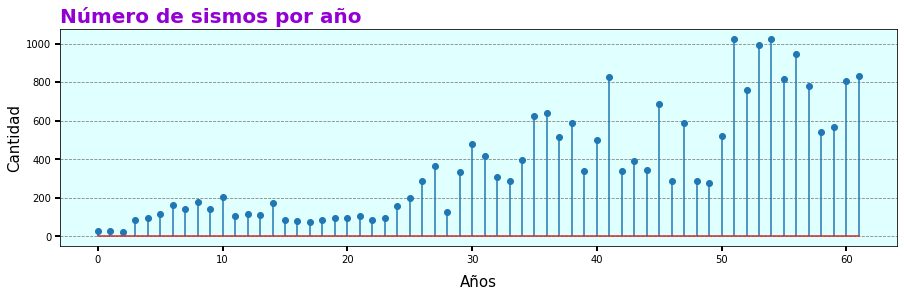

In [629]:
# Gráfica del número de sismos por año

# Generamos la figura y los ejes con un tamaño conveniente 
fig,ax = plt.subplots(figsize=(15,4))

# Indicamos los datos a utilizar, así como un color de trazo y unos marcadores 
lineas = ax.stem(sismosPorAño)

# Asignamos un título 
ax.set_title("Número de sismos por año", loc="left",fontdict={'fontsize':20, 'fontweight':'bold','color':'#9400D3'})

# Asignamos etiquetas a los ejes
ax.set_xlabel("Años",fontsize=15, labelpad=10)
ax.set_ylabel("Cantidad",fontsize=15)

# Agregamos líneas horizontales para una mejor visualización
ax.grid(axis="y",color="gray",linestyle="dashed")

# Coloreamos el fondo de la figura y modificamos los marcadores de los ejes (ticks)
ax.set_facecolor("#E0FFFF")
ax.tick_params(width=2,length=5)

# Mostramos la figura
plt.show()

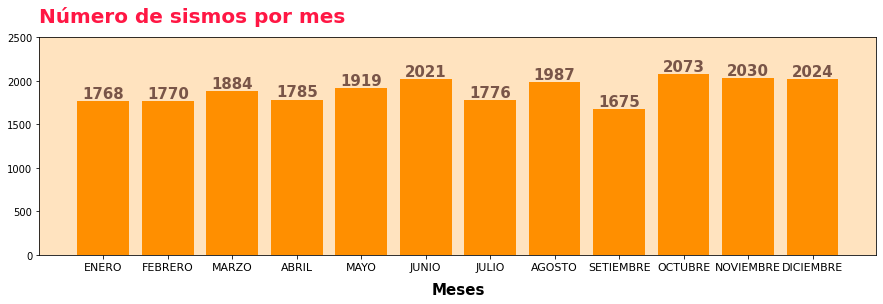

In [688]:
# Gráfica del número de sismos por mes de los años 1960 a 2021

# Generamos la figura base y los ejes
fig,ax = plt.subplots(figsize=(15,4))

# Indicamos los datos y el tipo de figura como barras (bar)
barras = ax.bar(sismosPorMes.index.str.upper(),sismosPorMes.array,color="#FF8F00")

# Agregamos formato a las etiquetas
ax.bar_label(barras, label_type="edge",color="#795548",fontweight="bold",fontsize=15)
ax.set_title("Número de sismos por mes",fontsize=20,loc="left",pad=15,color="#FF1744",fontweight="bold")

# Agregamos un color de fondo 
ax.set_facecolor("#FFE3BF")

# Agregamos formato a los ejes
ax.set_xlabel("Meses",fontsize=15,fontweight="bold",labelpad=10)
ax.set_ylim(top=2500)
ax.tick_params(axis="x",labelsize=11)

# Mostramos el resultado
plt.show()

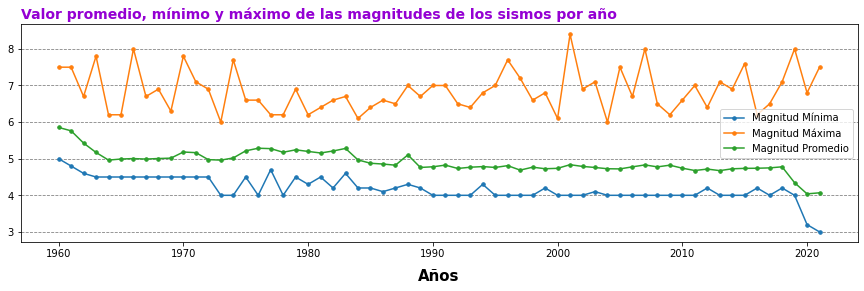

In [656]:
# Gráfica de los valores promedio, mínimo y máximos de la magnitud de los sismos por año

# Generamos la figura y ejes
fig,ax = plt.subplots(figsize=(15,4))

# Indicamos los datos a utilizar
rectas = magnitudesMinMaxProm.plot(ax = ax, marker="o", markersize=3.5)

# Posicionamos la leyenda en el márgen derecho
ax.legend(loc = "right")

# Agregamos un título con un formato específico
ax.set_title("Valor promedio, mínimo y máximo de las magnitudes de los sismos por año",
loc="left",fontdict={'fontsize':14, 'fontweight':'bold','color':'#9400D3'})

# Nombramos el eje "X"
ax.set_xlabel("Años",fontsize=15,fontweight="bold",labelpad=10)

# Generamos una malla horizontal
ax.grid(axis="y", color="gray", linestyle="dashed")

# Mostramos la figura
plt.show()

<AxesSubplot: >

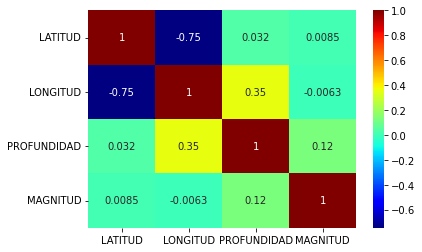

In [541]:
# Hallamos las relaciones entre las variables numéricas

# Haremos uso de la función corr()

# Generamos la figura base
plt.figure()
sns.heatmap(columnasDeTipoNumérico.corr(), annot=True, cmap='jet')

In [427]:
# El gráfico anterior muestra que los únicos índices de correlación significativas son 
# en los pares Latitud-Longitud y Profundidad-Longitud

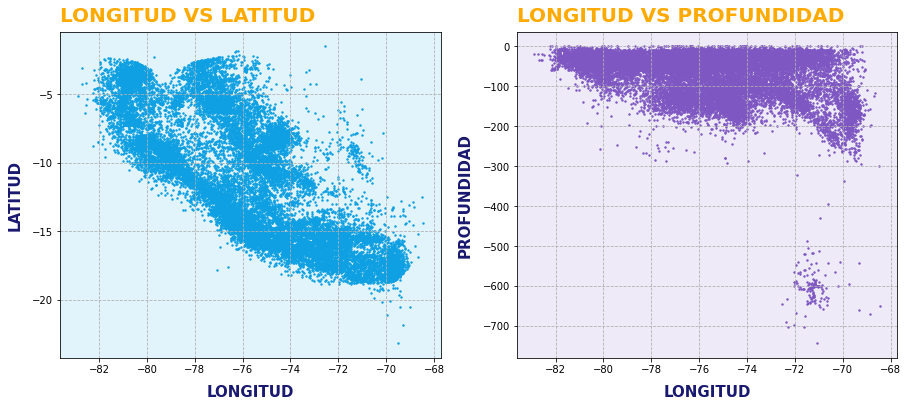

In [700]:
# Gráfica de Latitud-Longitud y Profundidad-Longitud

# LONGITUD - LATITUD

fig,ax = plt.subplots(1,2,sharex=True,figsize=(15,6))
ax[0].scatter(data["LONGITUD"],data["LATITUD"],s=2,c="#0EA0E2")
ax[0].set_xlabel("LONGITUD",fontdict={"fontsize":15,"fontweight":"bold","color":"#191970"},labelpad=10)
ax[0].set_ylabel("LATITUD",fontdict={"fontsize":15,"fontweight":"bold","color":"#191970"},labelpad=10)
ax[0].set_title("LONGITUD VS LATITUD",loc="left",fontdict={"fontsize":20,"fontweight":"bold","color":"#FFAA00"}, pad = 10)
ax[0].set_facecolor("#E1F3FB")
ax[0].grid(linestyle="dashed")


# LONGITUD - PROFUNDIDAD

ax[1].scatter(data["LONGITUD"],data["PROFUNDIDAD"]*-1,s=2,c="#7E57C2")
ax[1].set_xlabel("LONGITUD",fontdict={"fontsize":15,"fontweight":"bold","color":"#191970"},labelpad=10)
ax[1].set_ylabel("PROFUNDIDAD",fontdict={"fontsize":15,"fontweight":"bold","color":"#191970"},labelpad=10)
ax[1].set_title("LONGITUD VS PROFUNDIDAD",loc="left",fontdict={"fontsize":20,"fontweight":"bold","color":"#FFAA00"}, pad = 10)
ax[1].set_facecolor("#EFEAF7")
ax[1].grid(linestyle="dashed")
plt.show()

Procederemos a hallar las rectas que mejor se aproximan a los datos

LONGITUD - LATITUD

C:\Users\LENOVO.LAPTOP-0C62EG98\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


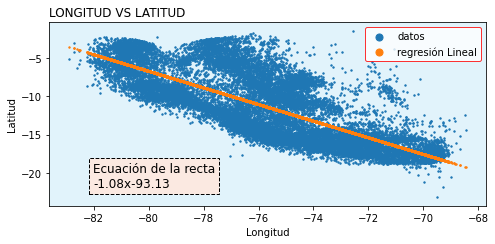

In [865]:
# Importamos la función de modelo lineal
from  sklearn import linear_model

# Generamos el modelo
modelLongLat = linear_model.LinearRegression()

# Agregamos los datos al modelo lineal
modelLongLat.fit(data["LONGITUD"].values.reshape(-1,1),data["LATITUD"].values)

# Calculamos las ordenadas de los puntos de la recta 
predictionLongLat = modelLongLat.predict(data["LONGITUD"].values.reshape(-1,1))

# La recta tendrá por ecuación ax + b, donde:
a = modelLongLat.coef_[0]
b = modelLongLat.intercept_ 

# Graficamos los resultados
fig,ax = plt.subplots()

# Gráfica de los puntos del tipo (Longitud,Latitud)
ax.scatter(data["LONGITUD"],data["LATITUD"],label="datos",s=2)

# Gráfica de la recta
ax.scatter(data["LONGITUD"],predictionLongLat,label="regresión Lineal",s=2)

# Leyenda
plt.legend(loc="upper right",markerscale=5,edgecolor="red")

# Agregamos el título,etiquetas a los ejes y un fondo
ax.set_title("LONGITUD VS LATITUD",loc="left")
ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")
ax.set_facecolor("#E1F3FB")

# Agregamos un texto con la ecuación de la recta 
plt.text(0.1,0.1,"Ecuación de la recta\n"+f"{a:.2f}"+"x"+f"{b:.2f}",
transform=ax.transAxes,bbox={"facecolor":"#FBE9E1","linestyle":"dashed"},fontsize=12)

# Mostramos los resultados
plt.show()



In [ ]:
# Evaluaremos la calidad del modelo lineal

# Para ello importamos la función de error cuadrático medio
from sklearn.metrics import mean_squared_error

In [857]:
# Error cuadrático medio o mean squared error (mse)
mse = mean_squared_error(data["LATITUD"].values,predictionLongLat)

# Raíz del error cuadrático medio (rmse)
rmse = np.sqrt(mse)

# Coeficiente de determinación R2
r2 = modelLongLat.score(data["LONGITUD"].values.reshape(-1,1),data["LATITUD"].values)

pd.Series([mse,rmse,r2],
index=["Error cuadrático medio","Raíz error cuadrático medio","Coeficiente de determinación"])

Error cuadrático medio          8.876967
Raíz error cuadrático medio     2.979424
Coeficiente de determinación    0.556085
dtype: float64

El coeficiente de correlación indica que existe una correlación moderada (0.55) entre los 
valores de Longitud y Latitud

LONGITUD - PROFUNDIDAD

C:\Users\LENOVO.LAPTOP-0C62EG98\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


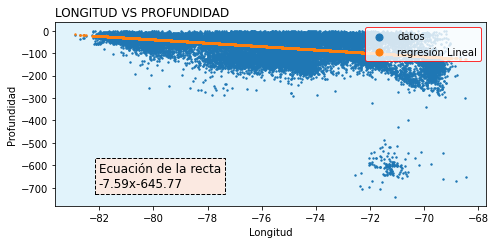

In [867]:
# Generamos el modelo
modelLongProf = linear_model.LinearRegression()

# Agregamos los datos al modelo lineal
modelLongProf.fit(data["LONGITUD"].values.reshape(-1,1),(data["PROFUNDIDAD"]*-1).values)

# Calculamos las ordenadas de los puntos de la recta 
predictionLongProf = modelLongProf.predict(data["LONGITUD"].values.reshape(-1,1))

# La recta tendrá por ecuación mx+n, donde:
m = modelLongProf.coef_[0]
n = modelLongProf.intercept_ 

# Graficamos los resultados
fig,ax = plt.subplots()

# Gráfica de los puntos del tipo (Longitud,Latitud)
ax.scatter(data["LONGITUD"],data["PROFUNDIDAD"]*-1,label="datos",s=2)

# Gráfica de la recta
ax.scatter(data["LONGITUD"],predictionLongProf,label="regresión Lineal",s=2)

# Leyenda
plt.legend(loc="upper right",markerscale=5,edgecolor="red")

# Agregamos el título,etiquetas a los ejes y un fondo
ax.set_title("LONGITUD VS PROFUNDIDAD",loc="left")
ax.set_xlabel("Longitud")
ax.set_ylabel("Profundidad")
ax.set_facecolor("#E1F3FB")

# Agregamos un texto con la ecuación de la recta 
plt.text(.1,.1,"Ecuación de la recta\n"+f"{m:.2f}"+"x"+f"{n:.2f}",
transform=ax.transAxes,bbox={"facecolor":"#FBE9E1","linestyle":"dashed"},fontsize=12)

# Mostramos los resultados
plt.show()


In [862]:
# Evaluaremos la calidad del modelo lineal

# Error cuadrático medio o mean squared error (mse)
mse_2 = mean_squared_error((data["PROFUNDIDAD"]*-1).values,predictionLongProf)

# Raíz del error cuadrático medio (rmse)
rmse_2 = np.sqrt(mse_2)

# Coeficiente de determinación R2
r2_2 = modelLongProf.score(data["LONGITUD"].values.reshape(-1,1),(data["PROFUNDIDAD"]*-1).values)

pd.Series([mse_2,rmse_2,r2_2],
index=["Error cuadrático medio","Raíz error cuadrático medio","Coeficiente de determinación"])



Error cuadrático medio          3844.094010
Raíz error cuadrático medio       62.000758
Coeficiente de determinación       0.125002
dtype: float64

El coeficiente de correlación (0.12) en este caso indica que la correlación entre las variables Longitud y Profundidad es inexistente.